
# Project: Investigate a Dataset (Gapminder World)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#References">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

>Gapminder has collected a lot of information about how people live heir lives in different countries, racked across the years, and on a umber of different indicators. For this project I selected child mortality, income, life expectancy, and population indicators.  
>
>I am going to clean and merge these indicators into one DataFrame then going deep analyzing It tracking the relations between different indicators trying to get insights to make decisions that should make our life better.
>
>Questions to be answered:
>
>Have certain regions of the world been growing in selected indicators better than others?
>
>Is child mortality related to any other indicators?
>
>Is life expectancy child mortality related to any other indicators?
>
>Is Income related to population?

<a id='wrangling'></a>
## Data Wrangling

### Asessing and cleaning Data

In [73]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
sns.set_style('darkgrid')

# Loading data and printing out a few lines. 
df1 = pd.read_csv('child_mortality_0_5_year_olds_dying_per_1000_born.csv')
df2 = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted (1).csv')
df3 = pd.read_csv('life_expectancy_years (1).csv')
df4 = pd.read_csv('population_total.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 460.2+ KB


In [74]:
# Transposing year rows and renaming the value columns 
data_files = [df1, df2, df3, df4]
names = ['child_mortality','income','life_expectancy','population']
i = 0 
names = ['child_mortality','income','life_expectancy','population']
for df in data_files: 
    df = df.melt(['country'], var_name='year')
    df = df.rename(columns = {'value': names[i]}, inplace = False)
    data_files[i] = df
    i += 1
df1, df2, df3, df4 = data_files

In [75]:
df1.head() # Checking

,country,year,child_mortality
0,Afghanistan,1800,469.0
1,Albania,1800,375.0
2,Algeria,1800,460.0
3,Andorra,1800,NaN
4,Angola,1800,486.0


In [76]:
# Merging data files in one data file
dfm1= pd.merge(df1,df2,on=['year', 'country'], how= 'left')
dfm2 = pd.merge(dfm1,df3,on=['year', 'country'], how= 'left')
df = pd.merge(dfm2,df4,on=['year', 'country'], how= 'left')

In [77]:
df.head() #checking

,country,year,child_mortality,income,life_expectancy,population
0,Afghanistan,1800,469.0,603.0,28.2,3280000
1,Albania,1800,375.0,667.0,35.4,400000
2,Algeria,1800,460.0,715.0,28.8,2500000
3,Andorra,1800,NaN,1200.0,NaN,2650
4,Angola,1800,486.0,618.0,27.0,1570000


In [78]:
# Getting the dataset information  
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58695 entries, 0 to 58694
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          58695 non-null  object 
 1   year             58695 non-null  object 
 2   child_mortality  57045 non-null  float64
 3   income           46513 non-null  float64
 4   life_expectancy  55528 non-null  float64
 5   population       58695 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 3.1+ MB


Data has 58695  rows and 4 columns, child mortality represnets dead childs below age 5 per 1.000 births so it should be converted into intg. 

In [79]:
# Checking for null values and duplicates
df.isnull().sum()

country                0
year                   0
child_mortality     1650
income             12182
life_expectancy     3167
population             0
dtype: int64

Data has alot of null values that shouldn't be dropped because number of countries will be decreased from 195 to 187! It is better to fill nun values with zeros.

In [80]:
# Dealing with null values 
df.fillna(0, inplace= True)

In [81]:
# Checking
df.isnull().sum()

country            0
year               0
child_mortality    0
income             0
life_expectancy    0
population         0
dtype: int64

In [82]:
# Changing the type of the child mortality column data into intg
df.child_mortality=df.child_mortality.astype(int)

In [83]:
# Checking 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58695 entries, 0 to 58694
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          58695 non-null  object 
 1   year             58695 non-null  object 
 2   child_mortality  58695 non-null  int32  
 3   income           58695 non-null  float64
 4   life_expectancy  58695 non-null  float64
 5   population       58695 non-null  int64  
dtypes: float64(2), int32(1), int64(1), object(2)
memory usage: 2.9+ MB


In [84]:
# Checking for duplicate rows
df.duplicated().sum()

0

It is clear that data has no toataly duplicate rows

In [85]:
# Exploring unique values
df.nunique()

country             195
year                301
child_mortality     630
income             2418
life_expectancy     851
population         4750
dtype: int64

In [86]:
# Getting some statistical info
df.describe()

,child_mortality,income,life_expectancy,population
count,58695.000000,58695.000000,58695.000000,5.869500e+04
mean,203.540148,5094.384241,50.174385,2.328525e+07
std,186.049102,12169.372391,24.242602,1.007173e+08
min,0.000000,0.000000,0.000000,6.450000e+02
25%,13.000000,530.000000,31.700000,4.220000e+05
50%,162.000000,1190.000000,44.600000,2.610000e+06
75%,400.500000,3410.000000,73.500000,1.080000e+07
max,756.000000,179000.000000,94.800000,1.650000e+09


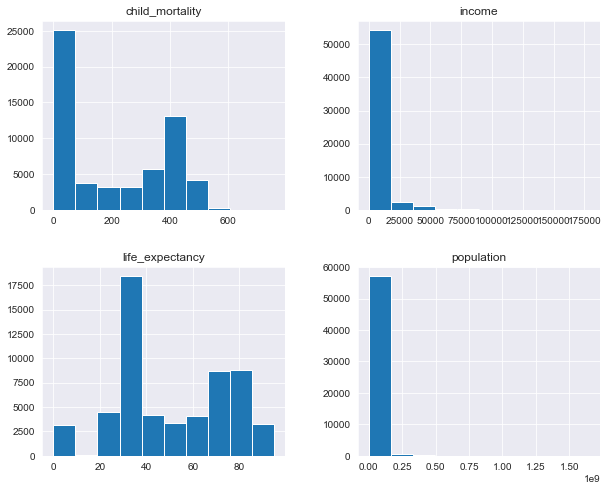

In [87]:
# Visulizing data 
df.hist(figsize= (10,8));

In [88]:
# Correlation 
df.corr()

,child_mortality,income,life_expectancy,population
child_mortality,1.000000,-0.295074,-0.683699,-0.140056
income,-0.295074,1.000000,0.245651,0.006699
life_expectancy,-0.683699,0.245651,1.000000,0.172869
population,-0.140056,0.006699,0.172869,1.000000


It seems that there is a correlation between income and child mortality (inverse relation).

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Have certain regions of the world been growing in selected indicators better than others?)

In [89]:
# Setting the country as the index
df.set_index('country', inplace= True)

In [90]:
df.head() # Checking

,year,child_mortality,income,life_expectancy,population
country,,,,,
Afghanistan,1800,469,603.0,28.2,3280000
Albania,1800,375,667.0,35.4,400000
Algeria,1800,460,715.0,28.8,2500000
Andorra,1800,0,1200.0,0.0,2650
Angola,1800,486,618.0,27.0,1570000


In [91]:
# Working with the mean values of indicators over years
df_means = df.groupby(['country']).mean()
df_m = df_means
df_m

,child_mortality,income,life_expectancy,population
country,,,,
Afghanistan,292.249169,1133.591362,45.070664,2.408907e+07
Albania,203.362126,3005.966777,56.954153,1.506748e+06
Algeria,252.149502,4105.006645,52.704983,2.416276e+07
Andorra,4.794020,13295.880399,12.720930,3.167442e+04
Angola,296.455150,2065.936877,45.443189,3.171944e+07
...,...,...,...,...
Venezuela,202.418605,5376.910299,54.572093,1.476439e+07
Vietnam,215.249169,1733.754153,52.309967,4.791528e+07
Yemen,319.956811,1449.521595,43.551827,1.736767e+07


In [92]:
df_m.describe()

,child_mortality,income,life_expectancy,population
count,195.000000,195.000000,195.000000,1.950000e+02
mean,203.540148,5094.384241,50.174385,2.328525e+07
std,68.302423,5268.751175,12.821073,8.134344e+07
min,2.348837,0.000000,0.000000,8.513322e+02
25%,167.500000,1388.029900,47.538206,1.219176e+06
50%,218.139535,3127.451827,52.095349,5.045389e+06
75%,251.524917,6847.807309,56.529236,1.726764e+07
max,330.468439,32121.328904,67.243854,7.993920e+08


In [93]:
df_m.idxmax()[1:4]

income              Qatar
life_expectancy    Norway
population          China
dtype: object

In [94]:
df_m.child_mortality.idxmin()

'Monaco'

From the past calculations Qatar has the highest mean income level, Norway has the highest mean life expectancy level, China has the highest population levels, Monaco has the least number of child mortalities below age 5 per 1.000 births. 

### Research Question 2 (Is child  mortality related to any other indicators?)

In [95]:
# Creating a function that plot the scatter relation between given indicators 
def plot_scatter(df, indicator_effected ,indicator1, indicator2):
    ''' 
    Input data: df DataFrame, indicator_effected, indicator1, indicator2
    Output: two figures
        1-Relation between indicator_effected and indicator1
        2-Relation between indicator_effected and indicator2
    '''
    scatter1 = df.plot(kind = 'scatter', x = indicator1, y = indicator_effected)
    plt.title('Efeect of {} on {}'.format(indicator1, indicator_effected ), fontsize = 15)
    scatter2 = df.plot(kind= "scatter", x = indicator2, y = indicator_effected)
    plt.title('Efeect of {} on {}'.format(indicator2, indicator_effected), fontsize = 15)
    return scatter1, scatter2

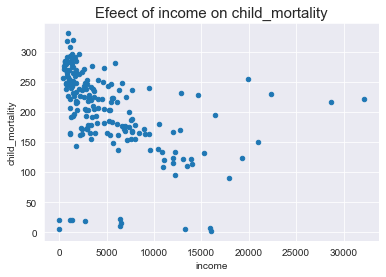

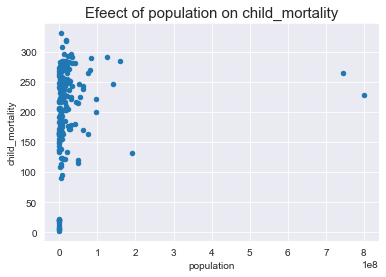

In [96]:
# Studying the relation between child mortality and other indicators
plot_scatter(df_m, 'child_mortality' , 'income' , 'population');

Increase in income decreases child mortality. population increase seems to have no strong effect on child mortality.

Why not specefying the country of the higest and lowst level of child mortalities to see what is there on small scale!

In [97]:
# Getting the country with the lowst and higest mean levels of child mortality
df_m.child_mortality.idxmax(), df_m.child_mortality.idxmin()

('Sierra Leone', 'Monaco')

In [104]:
# Specifying the data to the country Monaco  
df_Monaco = df_m.query('country == "Monaco"')
# Comparing between moncao's mean income and the mean income of all countires  
df_Monaco['income'] > df_m['income'].mean()

country
Monaco    True
Name: income, dtype: bool

In [105]:
# Comparing between moncao's mean population and the mean population of all countires  
df_Monaco['population'] < df_m['population'].mean()

country
Monaco    True
Name: population, dtype: bool

Monaca which is the country that has the lowst mean value of child mortality has an income mean grater than the mean of other countries income means and a population mean less than the mean of other countries population means.

In [106]:
# Specifying the data to the country Sierra Leone 
df_sierra = df_m.query('country == "Sierra Leone"')
# Comparing between df_sierra's mean income and the mean income of all countires  
df_sierra['income'] > df_m['income'].mean()

country
Sierra Leone    False
Name: income, dtype: bool

In [113]:
# Comparing between moncao's mean population and the mean population of all countires  
df_sierra['population'] < df_m['population'].mean()

country
Sierra Leone    True
Name: population, dtype: bool

Now we can say that it is clear on the large scale of all countries and on the small scale of the two countires of highest and lowst level of child mortality that increase in income decreases the child mortality, but increase in population has no strong effect on it.

### Research Question 3 (Is life expectancy child mortality related to any other indicators?)

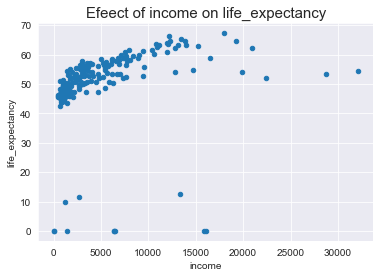

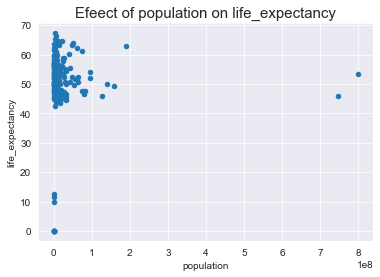

In [102]:
# Studying the relation between life expectancy and other indicators
plot_scatter(df_m, 'life_expectancy' , 'income' , 'population');

Life expectancy increases by the increase in income. population increase seems to have an inverse effect on life expectancy.

In [117]:
# Getting the country with the lowst and higest mean levels of Life expectancy
df_m.life_expectancy.idxmax(), df_m.life_expectancy.idxmin()

('Norway', 'Holy See')

In [118]:
# Specifying the data to the country Monaco  
df_Norway = df_m.query('country == "Norway"')
# Comparing between moncao's mean income and the mean income of all countires  
df_Norway['income'] > df_m['income'].mean()

country
Norway    True
Name: income, dtype: bool

In [120]:
# Comparing between Norway's mean population and the mean population of all countires  
df_Norway['population'] < df_m['population'].mean()

country
Norway    True
Name: population, dtype: bool

Norway which is the country that has the highest mean value of life expectancy has an income mean grater than the mean of other countries income means and a population mean less than the mean of other countries population means.

In [121]:
# Specifying the data to the country Holy See 
df_HolySee = df_m.query('country == "Sierra Leone"')
# Comparing between Holy See's mean income and the mean income of all countires  
df_HolySee['income'] > df_m['income'].mean()

country
Sierra Leone    False
Name: income, dtype: bool

In [122]:
# Comparing between Holy See's mean population and the mean population of all countires  
df_HolySee['population'] < df_m['population'].mean()

country
Sierra Leone    True
Name: population, dtype: bool

Now we can say that it is clear on the large scale of all countries and on the small scale of the two countires of highest and lowst level of life expectancy that increase in income increases the life expectancy , but increase in population has no strong effect on it.

### Research Question 4 (Is Income related to population?)

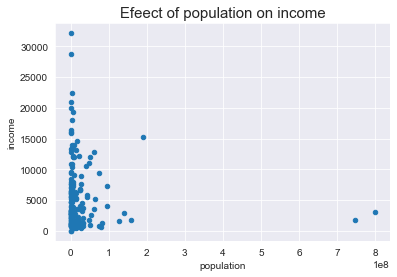

In [138]:
# Relation between income and population 
df_m.plot(kind = 'scatter', x = "population", y = "income")
plt.title('Efeect of {} on {}'.format("population", "income"), fontsize = 15);

In [135]:
# Getting the country with the lowst and higest mean levels of population
df_m.population.idxmax()

'China'

In [136]:
# Checking for China which has the higest population mean
df_china = df_m.query('country == "China"')
df_china['income'] > df_m['income'].mean()

country
China    False
Name: income, dtype: bool

Increase in population has an inverse effect on income

# Conclusions 

### After analysis of the data we concluded the next outcomes:
    
Qatar has the highest mean income level, Norway has the highest mean life expectancy level, China has the highest population mean levels, and Monaco has the least number of child mortalities below age 5 per 1.000 births.

An increase in income decreases child mortality, but an increase in population has no strong effect on it.

An increase in income increases life expectancy, but an increase in population has no strong effect on it.

An increase in population has an inverse effect on income.

<a id='References'></a>
# References

[How can I use for loop with melt and rename in pandas?](https://stackoverflow.com/questions/67883030/how-can-i-use-for-loop-with-melt-and-rename-in-pandas/67883186#67883186)

[Transpose Dataframe Columns into Rows](https://macxima.medium.com/python-transpose-dataframe-columns-into-rows-d0154a34752c)

[Joins in Pandas](https://www.analyticsvidhya.com/blog/2020/02/joins-in-pandas-master-the-different-types-of-joins-in-python/)

[Get the index of minimum value in DataFrame column](https://www.geeksforgeeks.org/get-the-index-of-minimum-value-in-dataframe-column/)
[How can I use for loop with melt and rename in pandas?](https://stackoverflow.com/questions/67883030/how-can-i-use-for-loop-with-melt-and-rename-in-pandas/67883186#67883186)